# Lab | Customer Analysis Round 7

For this lab, we still keep using the `marketing_customer_analysis.csv` file that you can find in the `files_for_lab` folder.

Remember the previous rounds. Follow the steps as shown in previous lectures and try to improve the accuracy of the model. Include both categorical columns in the exercise.
Some approaches you can try in this exercise:

- use the concept of multicollinearity and remove insignificant variables
- use a different method of scaling the numerical variables
- use a different ratio of train test split
- use the transformation on numerical columns which align it more towards a normal distribution

### Get the data

We are using the `marketing_customer_analysis.csv` file.

### Dealing with the data

Already done in rounds 2 to 7.

**Bonus**: Build a function, from round 2 and round 7, to clean and process the data.

### Explore the data

Done in the round 3.

### Modeling

Description:

- Try to improve the linear regression model.

In [40]:
# Importing the libraries

import pandas as pd

import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [56]:
# Importing the dataframe

df = pd.read_csv("/Users/leozinho.air/Desktop/ironhack_da/class_04/lab-customer-analysis-round-2/files_for_lab/csv_files/marketing_customer_analysis.csv")

# Cleaning operations

columns = []

for i in range(len(df.columns)):
    columns.append(df.columns[i].lower().replace(' ', '_'))

df.columns = columns

# Dropping the column 'unnamed:_0'

df = df.drop(['unnamed:_0'], axis = 1)

# Checking for nan values in my df

df.isnull().sum()

df = df.dropna() # nan values dropped

df


,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
10,HG93801,Arizona,5154.764074,No,Extended,High School or Below,1/2/11,Employed,M,82730,...,0.0,1,Corporate Auto,Corporate L3,Offer2,Branch,442.521087,SUV,Large,A
13,KR82385,California,5454.587929,No,Basic,Master,1/26/11,Employed,M,66334,...,0.0,4,Personal Auto,Personal L3,Offer4,Call Center,331.200000,Two-Door Car,Medsize,A
16,FH51383,California,5326.677654,No,Basic,High School or Below,2/7/11,Employed,F,76717,...,0.0,6,Personal Auto,Personal L3,Offer4,Call Center,300.528579,Two-Door Car,Large,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10902,PP30874,California,3579.023825,No,Extended,High School or Below,1/24/11,Employed,F,28304,...,2.0,1,Personal Auto,Personal L2,Offer2,Agent,655.200000,Four-Door Car,Medsize,A
10903,SU71163,Arizona,2771.663013,No,Basic,College,1/7/11,Employed,M,59855,...,4.0,1,Personal Auto,Personal L2,Offer2,Branch,355.200000,Two-Door Car,Medsize,A
10904,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,0.0,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize,A
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A


# First model

## Results

R2 value is = 0.7339
<br>
The mean squared error of the model is = 21246.71
<br>
The root mean squared error of the model is = 145.76
<br>
The mean absolute error of the model is = 98.38


In [57]:
# X - y split

y = df['total_claim_amount']
X = df.drop(['total_claim_amount','vehicle_type','customer','effective_to_date','gender','renew_offer_type', 'vehicle_size'], axis = 1)

# Creating a dataframe with only numerical values

X_num = X.select_dtypes(include = np.number)

# Normalizing X num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # This is the normalization process
normalized_X = scaler.fit_transform(X_num) 
normalized_X = pd.DataFrame(normalized_X, columns = X_num.columns)


# One Hot Encoding over categorical vars

X_cat = X.select_dtypes(include = object)

X_dummies = pd.get_dummies(X_cat, drop_first= False)

X_dummies = cat_encoded.reset_index(drop = True)

X_dummies
normalized_X


# Concatenating the two dfs

X = pd.concat([normalized_X, X_dummies], axis = 1) # no y dep

# Here we have a Df with the normalized numerical columns and the categorical columns encoded with One Hot Encoding

# Let's train this first model

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test)


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7339
The mean squared error of the model is = 21246.71
The root mean squared error of the model is = 145.76
The mean absolute error of the model is = 98.38


# Second model
<br>
Checking the multicollinearity and removing insignificant variables
<br>

## Results

R2 value is = 0.7162
<br>
The mean squared error of the model is = 22661.39
<br>
The root mean squared error of the model is = 150.54
<br>
The mean absolute error of the model is = 101.38

### Unfortunately, this model does not improve the results. Better the first one!


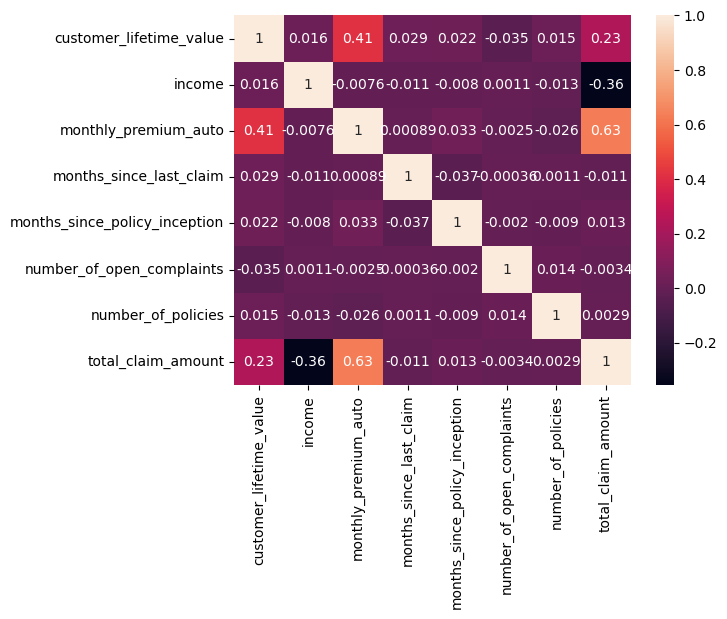

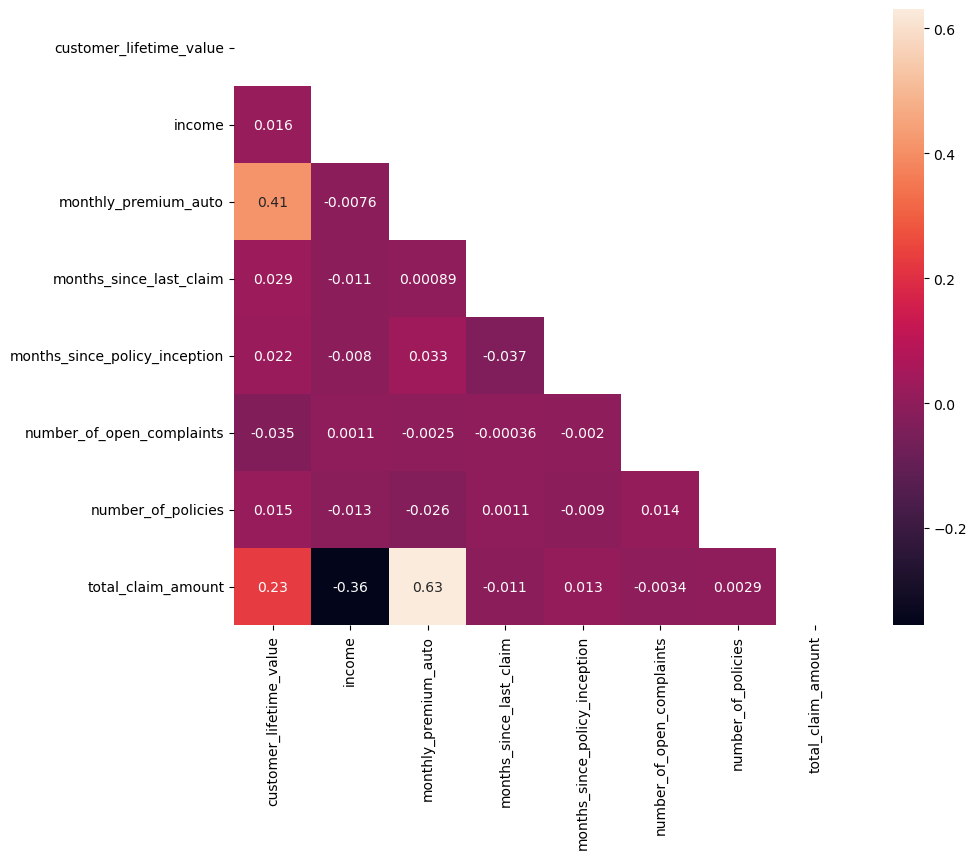

In [58]:
# Use the concept of multicollinearity and remove insignificant variables

# Creating the correlations matrix

correlations_matrix = df_num.corr()
correlations_matrix

# Visualizing the correlation matrix

sns.heatmap(correlations_matrix, annot=True)
plt.show()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True 
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()


# Third model
<br>
Using a different method of scaling the numerical variables
<br>

## Results

R2 value is = 0.7337
<br>
The mean squared error of the model is = 21267.0
<br>
The root mean squared error of the model is = 145.83
<br>
The mean absolute error of the model is = 97.85
### ### Unfortunately, this model does not improve the results. Still better the first one!
 


In [60]:
# X - y split

y = df['total_claim_amount']
X = df.drop(['total_claim_amount','vehicle_type','customer','effective_to_date','gender','renew_offer_type', 'vehicle_size'], axis = 1)

# Creating a dataframe with only numerical values

X_num = X.select_dtypes(include = np.number)

# Standardizing X num

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # This is the normalization process
standard_X = scaler.fit_transform(X_num) 
standard_X = pd.DataFrame(standard_X, columns = X_num.columns)


# One Hot Encoding over categorical vars

X_cat = X.select_dtypes(include = object)

X_dummies = pd.get_dummies(X_cat, drop_first= False)

X_dummies = cat_encoded.reset_index(drop = True)

X_dummies
standard_X


# Concatenating the two dfs

X = pd.concat([standard_X, X_dummies], axis = 1) # no y dep

# Here we have a Df with the normalized numerical columns and the categorical columns encoded with One Hot Encoding

# Let's train this first model

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test)


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7337
The mean squared error of the model is = 21267.0
The root mean squared error of the model is = 145.83
The mean absolute error of the model is = 97.85


# Fourth model

Using a different ratio of train test split

## Results

R2 value is = 0.7443
<br>
The mean squared error of the model is = 20268.08
<br>
The root mean squared error of the model is = 142.37
<br>
The mean absolute error of the model is = 98.37
### This model shows better results in every indicators. This is the best model until now!

In [61]:
# X - y split

y = df['total_claim_amount']
X = df.drop(['total_claim_amount','vehicle_type','customer','effective_to_date','gender','renew_offer_type', 'vehicle_size'], axis = 1)

# Creating a dataframe with only numerical values

X_num = X.select_dtypes(include = np.number)

# Normalizing X num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # This is the normalization process
normalized_X = scaler.fit_transform(X_num) 
normalized_X = pd.DataFrame(normalized_X, columns = X_num.columns)


# One Hot Encoding over categorical vars

X_cat = X.select_dtypes(include = object)

X_dummies = pd.get_dummies(X_cat, drop_first= False)

X_dummies = cat_encoded.reset_index(drop = True)

X_dummies
normalized_X


# Concatenating the two dfs

X = pd.concat([normalized_X, X_dummies], axis = 1) # no y dep

# Here we have a Df with the normalized numerical columns and the categorical columns encoded with One Hot Encoding

# Let's train this first model

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # Here i modified the test size from 20% to 33%

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test)


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7443
The mean squared error of the model is = 20268.08
The root mean squared error of the model is = 142.37
The mean absolute error of the model is = 98.37


# Fifth model

Use the transformation on numerical columns which align it more towards a normal distribution

## Results
R2 value is = 0.7309
<br>
The mean squared error of the model is = 21330.61
<br>
The root mean squared error of the model is = 146.05
<br>
The mean absolute error of the model is = 100.53


In [63]:
df_num = df.select_dtypes(include = np.number)
df_num.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount'],
      dtype='object')

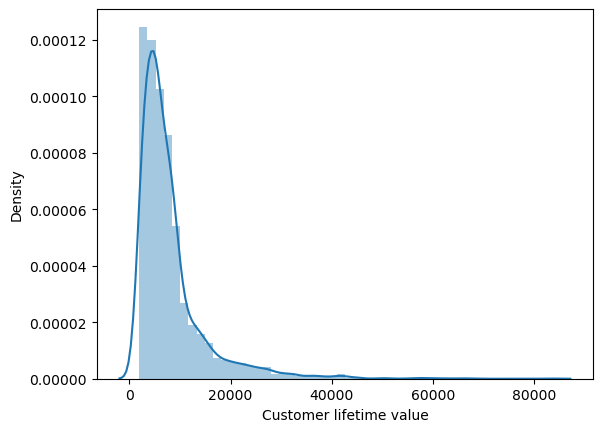

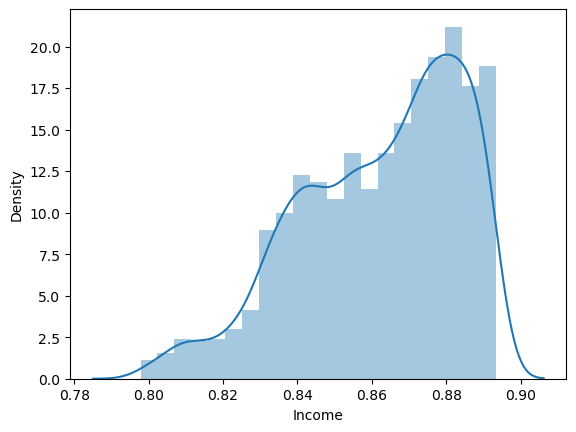

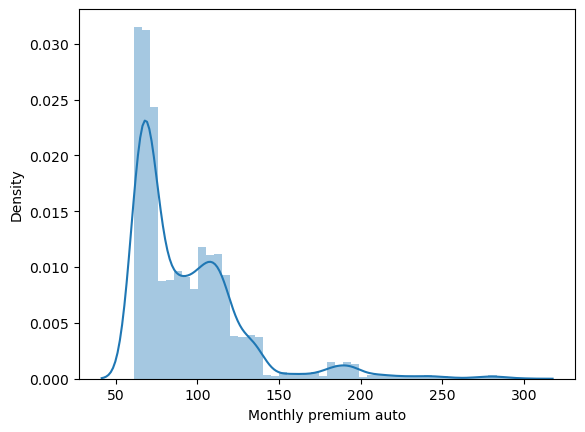

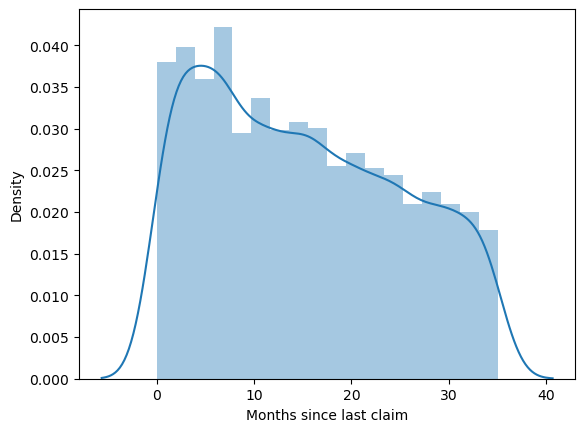

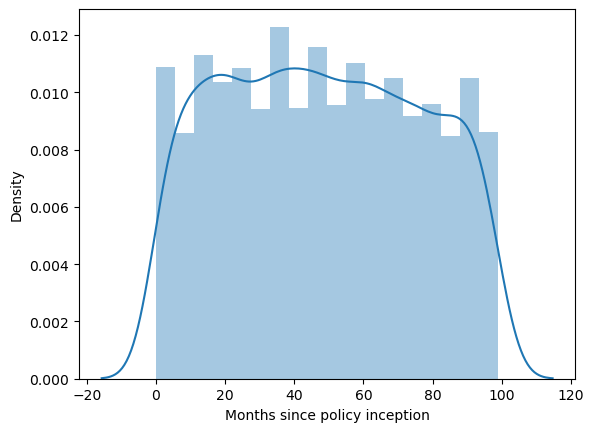

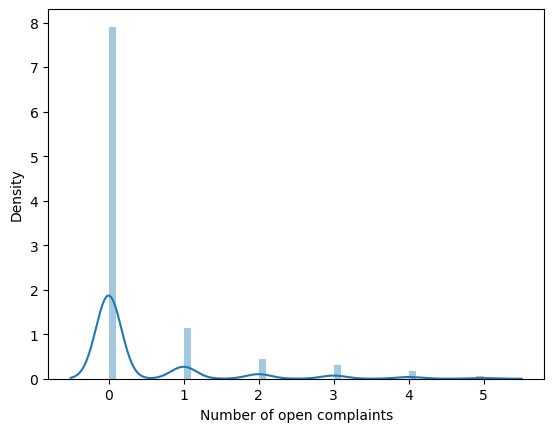

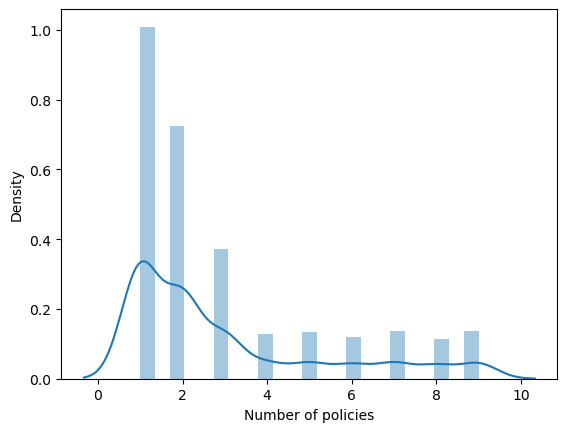

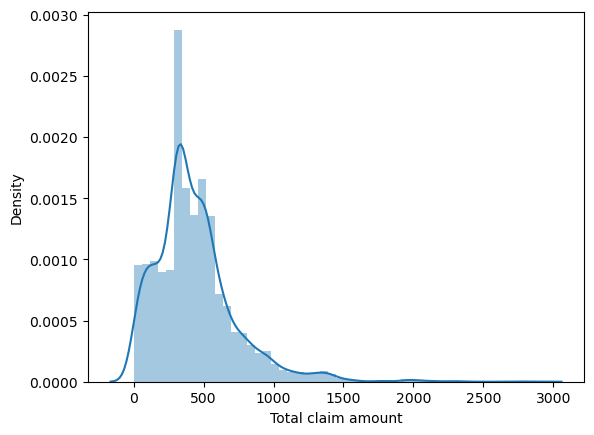

In [80]:

#Visualizing distribution

def plot_distribution(data, columns):
    
    '''This function automatizes the creation of the dist plots on seaborn'''
    
    for column in columns:
        sns.distplot(data[column])
        plt.xlabel(column.capitalize().replace('_', ' '))
        plt.show()

columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies',
       'total_claim_amount']

plot_distribution(df_num, columns)
# Most of the numerical columns that i want to implement in the model are higly positive skewed

# From the graphs, the only ones that are closer to a normal distribuited are 'months_since_last_claim', 'months_since_policy_inception'. 

# I will create a new model cutting off the other columns




In [81]:
# X - y split

y = df['total_claim_amount']
X = df.drop(['total_claim_amount','vehicle_type','customer','effective_to_date','gender','renew_offer_type', 'vehicle_size','customer_lifetime_value', 'income','monthly_premium_auto','number_of_open_complaints', 'number_of_policies'], axis = 1)

# Creating a dataframe with only numerical values

X_num = X.select_dtypes(include = np.number)

# Normalizing X num

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() # This is the normalization process
normalized_X = scaler.fit_transform(X_num) 
normalized_X = pd.DataFrame(normalized_X, columns = X_num.columns)


# One Hot Encoding over categorical vars

X_cat = X.select_dtypes(include = object)

X_dummies = pd.get_dummies(X_cat, drop_first= False)

X_dummies = cat_encoded.reset_index(drop = True)

X_dummies
normalized_X


# Concatenating the two dfs

X = pd.concat([normalized_X, X_dummies], axis = 1) # no y dep

# Here we have a Df with the normalized numerical columns and the categorical columns encoded with One Hot Encoding

# Let's train this first model

from sklearn.model_selection import train_test_split

# Train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42) # Here i modified the test size from 20% to 33%

# Creating the model

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

# Evaluating the model

lm.score(X_train,y_train) # This is the R^2

y_predictions = lm.predict(X_test)


r2 = r2_score(y_test, y_predictions)
mse = mean_squared_error(y_test, y_predictions)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_predictions)

print("R2 value is =", round(r2, 4))
print("The mean squared error of the model is =", round(mse, 2))
print("The root mean squared error of the model is =", round(rmse, 2))
print("The mean absolute error of the model is =", round(mae, 2))

R2 value is = 0.7309
The mean squared error of the model is = 21330.61
The root mean squared error of the model is = 146.05
The mean absolute error of the model is = 100.53
